In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Download required NLTK data files
nltk.download('stopwords')
nltk.download('wordnet')

# Define the preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data

# Preprocess the documents
preprocessed_documents = [preprocess(doc) for doc in documents]

In [ ]:
# Tokenize the documents
tokenized_docs = [doc.split() for doc in preprocessed_documents]

In [ ]:
# Train Word2Vec model on your corpus
word2vec_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=2, workers=4)

In [ ]:
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv]
    # If the document is not empty, compute the mean of the word vectors
    if len(doc) > 0:
        return np.mean(word2vec_model.wv[doc], axis=0)
    else:
        return np.zeros(100)  # Return a zero vector if the document is empty after removing out-of-vocab words

# Create document vectors for each document
doc_vectors = np.array([document_vector(doc) for doc in tokenized_docs])

In [ ]:
# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(doc_vectors)

# Example: Print similarity between document 0 and others
print(similarity_matrix[0])

[0.99999994 0.56015736 0.7050197  ... 0.6488701  0.6916576  0.79635227]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


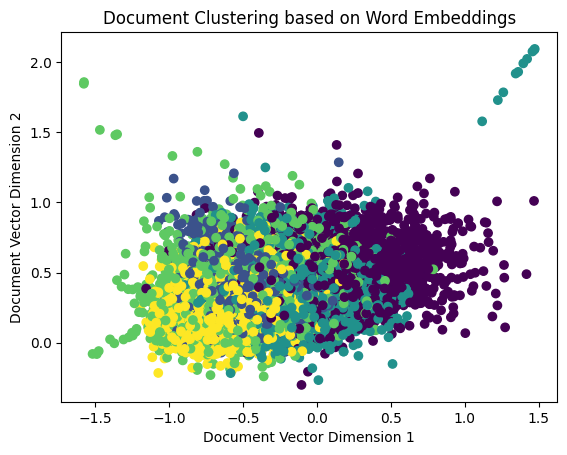

In [ ]:
# Perform KMeans clustering on the document vectors
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(doc_vectors)

# Visualize the clusters
plt.scatter(doc_vectors[:, 0], doc_vectors[:, 1], c=km.labels_, cmap='viridis')
plt.xlabel('Document Vector Dimension 1')
plt.ylabel('Document Vector Dimension 2')
plt.title('Document Clustering based on Word Embeddings')
plt.show()